In [1]:
# http://ipython.org/ipython-doc/rel-1.1.0/api/generated/IPython.core.magics.pylab.html#
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


# Warm up with sequences, lists

## Warm-up exercise I:  verifying sum of integers calculated by (young) Gauss

![C. F. Gauss](http://upload.wikimedia.org/wikipedia/commons/thumb/9/9b/Carl_Friedrich_Gauss.jpg/220px-Carl_Friedrich_Gauss.jpg)

http://mathandmultimedia.com/2010/09/15/sum-first-n-positive-integers/

>  Gauss displayed his genius at an early age. According to anecdotes, when he was in primary school, he was punished by his teacher due to misbehavior.  He was told to add the numbers from 1 to 100. He was able to compute its sum, which is 5050, in a matter of seconds.

>  Now, how on earth did he do it?

See also:

* http://en.wikipedia.org/wiki/Carl_Friedrich_Gauss#Anecdotes
* [The Gauss Christmath Special](http://youtu.be/sxnX5_LbBDU?t=4m52s) by [Vi Hart](http://en.wikipedia.org/wiki/Vi_Hart)

**Let's verify this result in a number of ways.  Take some time now to write some code to add up 1 to 100.**

Specifically:

* make use of [range](http://docs.python.org/2/library/functions.html#range)
* try [xrange](http://docs.python.org/2/library/functions.html#xrange)
* try an explicit loop vs `sum`
* bonus:  try [itertool.count](http://docs.python.org/2/library/itertools.html#itertools.count) and [itertool.islice](http://docs.python.org/2/library/itertools.html#itertools.islice) -- these functions are Python *iterators*. 
* See [Build a Basic Python Iterator](http://stackoverflow.com/a/24377/7782) and 
[The Python yield keyword explained](http://stackoverflow.com/questions/231767/the-python-yield-keyword-explained)


**Beware:  in ipython w/ pylab mode, `sum` might be overwritten by numpy's sum -- use `__builtin__.sum` if you want http://docs.python.org/2/library/functions.html#sum as opposed to http://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html** 


In [2]:
# using loop and xrange

n = 100

s = 0L
for i in xrange(n+1):
    s += i
print s

5050


In [3]:
# using builtin sum and range

print range(101)
sum(range(101))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


5050

In [4]:
# xrange
sum(xrange(101))

5050

In [5]:
# itertools is a great library
# http://docs.python.org/2/library/itertools.html#itertools.count
# itertools.count(start=0, step=1):
# "Make an iterator that returns evenly spaced values starting with step."

from itertools import islice, count
c = count(0, 1)

In [6]:
# look at how count() works by repetively calling c.next()
print c.next()
print c.next()
print c.next()

0
1
2


In [7]:
# let's add up using count and islice to limit how high we count

# also make sure we're also using the builtin sum 
# http://docs.python.org/2/library/functions.html#sum

__builtin__.sum(islice(count(0,1), 101L))

5050

In [8]:
# generator for the lowercase English alphabet

import string

def alpha1():
    m = list(string.lowercase)
    while m:
        yield m.pop(0)
    

In [9]:
import string

# make a generator comprehension -- generate items on demand

k = (s for s in list(string.lowercase))
k

<generator object <genexpr> at 0x10873b780>

In [10]:
k.next()

'a'

In [11]:
# compare to k1, a list comprehension
k1 = [s for s in list(string.lowercase)]
k1

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [12]:
# create my own version of itertools.count

def my_count(start, step):
    n = start
    while True:
        yield n
        n += step
        
__builtin__.sum(islice(my_count(0,1), 101L))

5050

### Triangular numbers

$T_n= \sum_{k=1}^n k = 1+2+3+ \dotsb +n = \frac{n(n+1)}{2} = {n+1 \choose 2}$

In [13]:
from itertools import islice

def triangular():
    n = 1
    i = 1
    while True:
        yield n
        i +=1
        n += i


In [14]:
for i, n in enumerate(islice(triangular(), 10)):
    print i+1, n

1 1
2 3
3 6
4 10
5 15
6 21
7 28
8 36
9 45
10 55


In [15]:
list(islice(triangular(), 100))[-1]

5050

In [16]:
list(islice(triangular(),99,100))[0]

5050

## Warm Up Exercise II: Wheat and chessboard problem

http://en.wikipedia.org/wiki/Wheat_and_chessboard_problem :

> If a chessboard were to have wheat placed upon each square such that one grain were placed on the first square, two on the second, four on the third, and so on (doubling the number of grains on each subsequent square), how many grains of wheat would be on the chessboard at the finish?

> The total number of grains equals 18,446,744,073,709,551,615, which is a much higher number than most people intuitively expect.

* try using [pow](http://docs.python.org/2/library/functions.html#pow)

In [17]:
# Legend of the Chessboard YouTube video

from IPython.display import YouTubeVideo
YouTubeVideo('t3d0Y-JpRRg')

In [18]:
# generator comprehension

k  = (pow(2,n) for n in xrange(64))
k.next()

1

In [19]:
__builtin__.sum((pow(2,n) for n in xrange(64)))

18446744073709551615L

In [20]:
pow(2,64) -1

18446744073709551615L

# Slicing/Indexing Review

http://stackoverflow.com/a/509295/7782

Use on any of the **sequence** types ([python docs on sequence types](http://docs.python.org/2/library/stdtypes.html#sequence-types-str-unicode-list-tuple-bytearray-buffer-xrange)):

> There are seven sequence types: strings, Unicode strings, lists, tuples, bytearrays, buffers, and xrange objects.

The use of square brackets are for accessing *slices* of sequence.

Let's remind ourselves of how to use slices

* `s[i]`
* `s[i:j]`
* `s[i:j:k]`
* meaning of negative indices
* 0-base counting



In [21]:
m = range(10)
m

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [22]:
m[0]

0

In [23]:
m[-1]

9

In [24]:
m[::-1]

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [25]:
m[2:3]

[2]

In [26]:
import string
alphabet = string.lowercase

alphabet

'abcdefghijklmnopqrstuvwxyz'

In [27]:
# 13 letter of the alphabet
alphabet[12]

'm'

**We will revisit generalized slicing in NumPy.**

#  Import/naming conventions and pylab mode

<http://my.safaribooksonline.com/book/programming/python/9781449323592/1dot-preliminaries/id2699702>

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from pandas import Series, DataFrame
    
These imports done for you in `pylab` mode.

## pylab mode

    ipython --help
    
yields

    --pylab=<CaselessStrEnum> (InteractiveShellApp.pylab)
        Default: None
        Choices: ['tk', 'qt', 'wx', 'gtk', 'osx', 'inline', 'auto']
        Pre-load matplotlib and numpy for interactive use, selecting a particular
        matplotlib backend and loop integration.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

# NumPy

<http://www.numpy.org/>:

NumPy is the **fundamental package for scientific computing with Python**. It contains among other things:

* a powerful N-dimensional array object [let's start with 1 and 2 dimensions]
* sophisticated (**broadcasting**) functions [what is *broadcasting*?]
* tools for integrating C/C++ and Fortran code [why useful?]
* useful linear algebra, Fourier transform, and random number capabilities

Besides its obvious scientific uses, NumPy can also be used as an efficient
multi-dimensional container of **generic data**. **Arbitrary data-types** can be
defined. This allows NumPy to seamlessly and speedily integrate with a wide
variety of databases.

See `PfDA`, Chapter 4


## ndarray.ndim, ndarray.shape

In [29]:
# first: a numpy array of zero-dimension

a0 = np.array(5)
a0

array(5)

use [shape](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) to get a tuple of array dimensions

In [30]:
a0.ndim, a0.shape

(0, ())

In [31]:
# 1-d array
a1 = np.array([1,2])
a1.ndim, a1.shape

(1, (2,))

In [32]:
# 2-d array

a2 = np.array(([1,2], [3,4]))
a2.ndim, a2.shape

(2, (2, 2))

## dtype:  type of given ndarray

In [33]:
a2.dtype

dtype('int64')

## np.arange

[arange](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html#numpy.arange) is one instance of [`ndarray` creating function in NumPy](http://docs.scipy.org/doc/numpy/reference/routines.array-creation.html)

Compare to `xrange`.

In [34]:
from numpy import arange

In [35]:
type(arange(10))

numpy.ndarray

In [36]:
for k in arange(10):
    print k

0
1
2
3
4
5
6
7
8
9


In [37]:
list(arange(10)) == list(xrange(10))

True

## NumPy.ndarray.reshape

In [38]:
#how to map 0..63 -> 2x2 array
a3 = np.arange(64).reshape(8,8)
a3

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

In [39]:
# 2nd row, 3rd column --> remember index starts at 0
a3[1,2]

10

In [40]:
# check that reshape works

for i in range(8):
    for j in range(8):
        if a3[i,j] != i*8 + j:
            print i, j

##scalar multiplication

example of [broadcasting](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html):

> The term broadcasting describes how numpy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are, however, cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.

In [41]:
2*a3

array([[  0,   2,   4,   6,   8,  10,  12,  14],
       [ 16,  18,  20,  22,  24,  26,  28,  30],
       [ 32,  34,  36,  38,  40,  42,  44,  46],
       [ 48,  50,  52,  54,  56,  58,  60,  62],
       [ 64,  66,  68,  70,  72,  74,  76,  78],
       [ 80,  82,  84,  86,  88,  90,  92,  94],
       [ 96,  98, 100, 102, 104, 106, 108, 110],
       [112, 114, 116, 118, 120, 122, 124, 126]])

## add 2 to all elements in a3

In [42]:
a3+2

array([[ 2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30, 31, 32, 33],
       [34, 35, 36, 37, 38, 39, 40, 41],
       [42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57],
       [58, 59, 60, 61, 62, 63, 64, 65]])

## sorting

In [43]:
# reverse sort -- best way?
#http://stackoverflow.com/a/6771620/7782

np.sort(np.arange(100))[::-1]

array([99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83,
       82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66,
       65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49,
       48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32,
       31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

## Boolean slice:  important novel type of slicing

**This stuff is a bit tricky** (see PfDA, pp. 89-92)

Consider example of picking out whole numbers less than 20 that are evenly divisible by 3.  Generate a list of such numbers

In [44]:
# list comprehension

[i for i in xrange(20) if i % 3 == 0]

[0, 3, 6, 9, 12, 15, 18]

In [45]:
a3 = np.arange(20) 
a3

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [46]:
# basic indexing

print a3[0]
print a3[::-1]
print a3[2:5]

0
[19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]
[2 3 4]


In [47]:
np.mod(a3, 3)

array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1])

In [48]:
np.mod(a3, 3) == 0

array([ True, False, False,  True, False, False,  True, False, False,
        True, False, False,  True, False, False,  True, False, False,
        True, False], dtype=bool)

In [49]:
divisible_by_3 = np.mod(a3, 3) == 0

In [50]:
a3[divisible_by_3]

array([ 0,  3,  6,  9, 12, 15, 18])

In [51]:
# if you want to understand this in terms of the overloaded operators -- don't worry if you don't get this.
a3.__getitem__(np.mod(a3,3).__eq__(0))

array([ 0,  3,  6,  9, 12, 15, 18])

## Exercise:  Calculate a series that holds all the squares less than 100

Use arange, np.sqrt, [astype](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.astype.html)

In [52]:
a4 = arange(100)
a4sqrt = np.sqrt(a4)
a4[a4sqrt == a4sqrt.astype(np.int)]

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

## We will come back to indexing later.

http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html

# Pandas

## pandas.Series

Make a series out of an array

In [53]:
s1 = Series(arange(5))

  confirm that the type of s1 is  what you would expect

In [54]:
type(s1)

pandas.core.series.Series

show that the series is also an array

In [55]:
s1.ndim, isinstance(s1, np.ndarray)

(1, False)

In [56]:
s1.index

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [57]:
import string
allTheLetters = string.lowercase
allTheLetters

'abcdefghijklmnopqrstuvwxyz'

In [58]:
s2 = Series(data=arange(5), index=list(allTheLetters)[:5])
s2

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [59]:
s2.index

Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')

http://my.safaribooksonline.com/book/programming/python/9781449323592/5dot-getting-started-with-pandas/id2828378 :

> Compared with a regular NumPy array, you can use values in the index when selecting single values or a set of values

In [60]:
# can use both numeric indexing and the labels
s2[0], s2['a']

(0, 0)

In [61]:
for i in range(len(s2)):
    print i, s2[i]

0 0
1 1
2 2
3 3
4 4


it is possible conflict in indexing -- consider

In [62]:
s3 = Series(data=['albert', 'betty', 'cathy'], index=[3,1, 0])
s3

3    albert
1     betty
0     cathy
dtype: object

In [63]:
s3[0], list(s3)[0]

('cathy', 'albert')

but slicing works to return specific numeric index

In [64]:
s3[::-1]

0     cathy
1     betty
3    albert
dtype: object

In [65]:
for i in range(len(s3)):
    print i, s3[i:i+1]

0 3    albert
dtype: object
1 1    betty
dtype: object
2 0    cathy
dtype: object


In [66]:
s3.name = 'person names'
s3.name

'person names'

In [67]:
s3.index.name = 'confounding label'
s3.index.name

'confounding label'

In [68]:
s3

confounding label
3    albert
1     betty
0     cathy
Name: person names, dtype: object

Important points remaining:

* "NumPy array operations, such as filtering with a boolean array, scalar multiplication, or applying math functions, will preserve the index-value link"
* "Another way to think about a Series is as a fixed-length, ordered dict, as it is a mapping of index values to data values. It can be substituted into many functions that expect a dict"

## Gauss & Chess revisited, using Series

You get some nice `matplotlib` integration via pandas

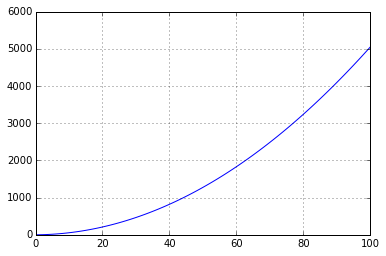

In [69]:
# Gauss addition using np.arange, Series 

from pandas import Series
Series(arange(101).cumsum()).plot()

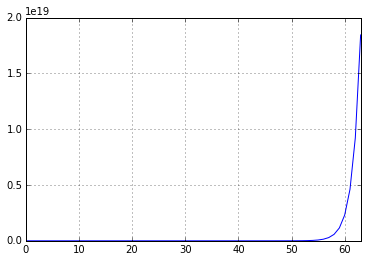

In [70]:
from pandas import Series
Series((pow(2,k) for k in xrange(64)), dtype=np.float64).cumsum().plot()

## Wheat and Chessboard w/ NumPy

http://docs.scipy.org/doc/numpy/reference/ufuncs.html

In [71]:
# http://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html
from numpy import ones

In [72]:
2*ones(64, dtype=np.int)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [73]:
arange(64)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [74]:
sum(np.power(2, arange(64, dtype=np.uint64)))

1.8446744073709552e+19

In [75]:
sum(np.power(2*ones(64, dtype=np.uint64), arange(64))) 

1.8446744073709552e+19

In [76]:
precise_ans = sum([pow(2,n) for n in xrange(64)])
np_ans = sum(np.power(2*ones(64, dtype=np.uint64), arange(64)))

precise_ans, np_ans



(18446744073709551615L, 1.8446744073709552e+19)

In [77]:
# Raise an assertion if two items are not equal up to desired precision.
np.testing.assert_almost_equal(precise_ans, np_ans) is None

True

# DataFrame

so many ways to use DataFrames....let's try them out in context of the census calculations

In [78]:
# not really intuitive to me:  reversal of column/row
DataFrame(dict([('06', {'name': 'California', 'abbreviation':'CA'})] ))

,06
abbreviation,CA
name,California


In [79]:
DataFrame([{'name': 'California', 'abbreviation':'CA'}], index= ['06'])

,abbreviation,name
06,CA,California


In [80]:
Series(['06'], name='FIPS')

0    06
Name: FIPS, dtype: object

In [81]:
DataFrame([{'name': 'California', 'abbreviation':'CA'}], 
          index=Series(['06'], name='FIPS'))

,abbreviation,name
FIPS,,
06,CA,California


# Advanced: Operator Overloading

In [82]:
n0 = 5
n0 == 5

True

Now I thought I'd be able to use a `n0.__eq__(5)` but nope -- it's complicated -- see http://stackoverflow.com/questions/2281222/why-when-in-python-does-x-y-call-y-eq-x#comment2254663_2282795

In [83]:
try:
    n0.__eq__(5)
except Exception as e:
    print e

'int' object has no attribute '__eq__'


can do: `int.__cmp__(x)`

In [84]:
(n0.__cmp__(4), n0.__cmp__(5), n0.__cmp__(6))

(1, 0, -1)

how about ndarray?

In [85]:
arange(5) == 2 

array([False, False,  True, False, False], dtype=bool)

In [86]:
# 
# http://docs.scipy.org/doc/numpy/reference/generated/numpy.array_equal.html
np.array_equal(arange(5) == 2 , arange(5).__eq__(2))

True

## Appendix: underlying mechanics of slicing

Useful if you want to understand how the slicing syntax really works.

In [87]:
isinstance([1,2], list)

True

In [88]:
isinstance(arange(5), list) # what does that mean -- could still be list-like

False

In [89]:
l1 = range(5)

In [90]:
type(l1)

list

In [91]:
l1[0], l1.__getitem__(0), l1[0] == l1.__getitem__(0)

(0, 0, True)

In [92]:
l1[::-1], l1.__getitem__(slice(None, None, -1))

([4, 3, 2, 1, 0], [4, 3, 2, 1, 0])

In [93]:
ar1 = arange(5)
ar1[3], ar1.__getitem__(3)

(3, 3)

In [94]:
ar1 == 2

array([False, False,  True, False, False], dtype=bool)

In [95]:
ar1[ar1 == 2].shape

(1,)

In [96]:
ar1.__eq__(2)

array([False, False,  True, False, False], dtype=bool)

In [97]:
ar1.__getitem__(slice(2, 4, None))

array([2, 3])

In [98]:
slice(ar1.__eq__(2), None, None)

slice(array([False, False,  True, False, False], dtype=bool), None, None)

In [99]:
ar1.__getitem__(ar1.__eq__(2))

array([2])

In [100]:
ar1[:2], ar1.__getitem__(slice(2))

(array([0, 1]), array([0, 1]))

In [101]:
ar1 + 7

array([ 7,  8,  9, 10, 11])

In [102]:
ar1.__add__(7)

array([ 7,  8,  9, 10, 11])

In [103]:
min(ar1 + 7)

7

In [104]:
alphabet[:]

'abcdefghijklmnopqrstuvwxyz'